In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
folder = r'C:\Users\palux\Desktop\df s\USA NAMES'
all_files = []

# Перечисляем все текстовые файлы в папке
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    
    # Проверяем, что это файл (а не папка) и что это текстовый файл
    if os.path.isfile(file_path) and filename.endswith('.txt'):
        all_files.append(file_path)

# Объединяем все текстовые файлы в один DataFrame
df_list = []
for file in all_files:
    # Извлекаем год из имени файла (например, из 'yob1880.txt' берем '1880')
    year = int(file.split('yob')[1].split('.txt')[0])
    
    # Читаем файл в DataFrame, используя табуляцию как разделитель
    df = pd.read_csv(file, sep=',', header=None)
    
    # Добавляем столбец с годом
    df['Year'] = year
    
    df_list.append(df)

# Объединяем все DataFrame в один
df = pd.concat(df_list, ignore_index=True)

# Сохраняем результат в новый файл с разделителем ',' (запятая)
df.to_csv(r'C:\Users\palux\Desktop\df s\combined_data.csv', index=False, sep=',')


In [21]:
df = df.rename(columns={df.columns[0]: 'name',
                            df.columns[1]: 'sex',
                            df.columns[2]: 'count',
                            df.columns[3]: 'year'})

<Axes: xlabel='year', ylabel='count'>

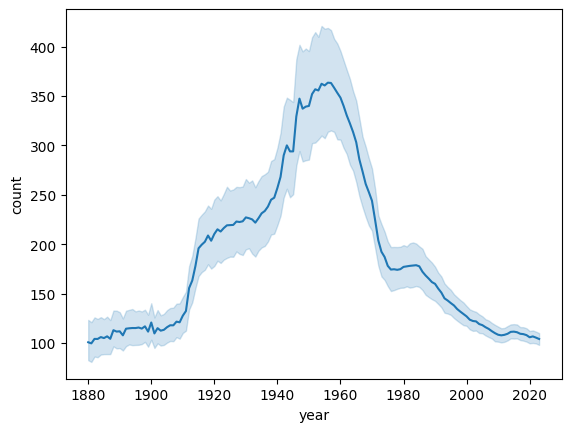

In [25]:
sns.lineplot(data = df, x='year', y='count')

In [47]:
df.sort_values(by = 'count',ascending=False)

,name,sex,count,year
431064,Linda,F,99693,1947
441435,Linda,F,96215,1948
437168,James,M,94761,1947
544677,Michael,M,92777,1957
437169,Robert,M,91654,1947
...,...,...,...,...
2117175,Zandon,M,5,2023
2117174,Zan,M,5,2023
2117173,Zale,M,5,2023
2117156,Zaheim,M,5,2023


Задание 1: Определите, какие имена были самыми популярными для мужчин и женщин в 2023 году.
Шаги:

1. Отфильтруйте данные для года 2023.
2. Сгруппируйте данные по полу и имени.
3. Для каждой группы посчитайте общее количество (суммируя столбец с количеством).
4. Найдите самые популярные имена для мужчин и женщин.

In [50]:
df1 = df[df['year'] == 2023]

In [77]:
df1.groupby('sex')['name'].agg(['count', count: 'sum'])

,name,sex,count
0,Aabha,F,6
1,Aadam,M,10
2,Aadarsh,M,5
3,Aaden,M,15
4,Aadhan,M,5
...,...,...,...
31677,Zyrie,M,13
31678,Zyrin,M,5
31679,Zyrus,M,14
31680,Zyshawn,M,6


In [80]:
top_names_2023 = df1.groupby(['name', 'sex'])['count'].sum().reset_index()
top_names_2023

,name,sex,count
0,Aabha,F,6
1,Aadam,M,10
2,Aadarsh,M,5
3,Aaden,M,15
4,Aadhan,M,5
...,...,...,...
31677,Zyrie,M,13
31678,Zyrin,M,5
31679,Zyrus,M,14
31680,Zyshawn,M,6


Задание 2: Проанализируйте тренды роста популярности имени "John" в период с 1880 по 2023 год.
Шаги:

1. Отфильтруйте данные, оставив только строки с именем "John".
2. Посмотрите, как изменялась популярность этого имени с течением времени.
3. Постройте график с осью X как год, а осью Y как количество для этого имени.


<Axes: xlabel='year', ylabel='count'>

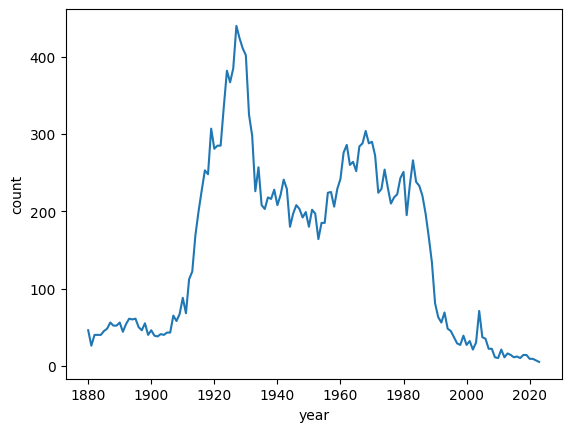

In [100]:
john_df = df[(df['name'] == 'John') & (df['sex']== 'F')]
john_df_sort = john_df.sort_values('count', ascending=False)
sns.lineplot(data = john_df_sort, x='year' , y='count')

<Axes: xlabel='year', ylabel='count'>

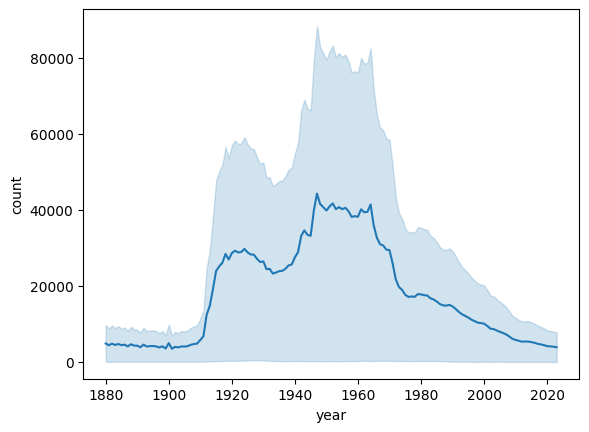

In [101]:
john_df = df[(df['name'] == 'John')]
john_df_sort = john_df.sort_values('count', ascending=False)
sns.lineplot(data = john_df_sort, x='year' , y='count')